In [1]:
import os
import numpy as np
import torch

In [2]:
from torch.utils.data import DataLoader
from generate_data import generate_op_data
from utils import load_model
from problems import OP

In [7]:
model, _ = load_model('outputs/op_55/op55_max_length5.5_20210315T032044')
torch.manual_seed(1234)
# dataset_1 = OP.make_dataset(size=34, num_samples=1,distribution='falcon')
dataset = OP.make_dataset(filename="asist\\saturn_A.pkl")

# Need a dataloader to batch instances
dataloader = DataLoader(dataset, batch_size=1)

# Make var works for dicts
batch = next(iter(dataloader))
batch["max_length"] = torch.tensor([5.5])

# Run the model
model.eval()
model.set_decode_type('greedy')
with torch.no_grad():
    length, log_p, pi = model(batch, return_pi=True)
tour = pi


original_tour = tour[0].tolist()
zero = original_tour.index(0)
print(original_tour)

tour_change_order = original_tour[zero:] + original_tour[:zero]
print(tour_change_order)

  [*] Loading model from outputs/op_55/op55_max_length5.5_20210315T032044\epoch-33.pt
[35, 33, 46, 50, 7, 2, 3, 23, 24, 21, 52, 11, 19, 14, 20, 22, 4, 5, 13, 51, 6, 18, 12, 10, 1, 8, 9, 15, 27, 16, 17, 30, 32, 53, 26, 29, 28, 25, 36, 37, 55, 39, 38, 31, 48, 54, 34, 40, 44, 49, 41, 45, 43, 42, 47, 0]
[0, 35, 33, 46, 50, 7, 2, 3, 23, 24, 21, 52, 11, 19, 14, 20, 22, 4, 5, 13, 51, 6, 18, 12, 10, 1, 8, 9, 15, 27, 16, 17, 30, 32, 53, 26, 29, 28, 25, 36, 37, 55, 39, 38, 31, 48, 54, 34, 40, 44, 49, 41, 45, 43, 42, 47]


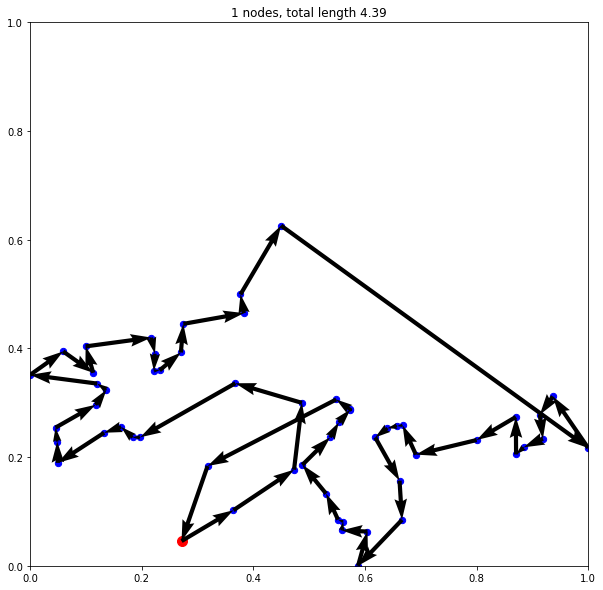

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# Code inspired by Google OR Tools plot:
# https://github.com/google/or-tools/blob/fb12c5ded7423d524fc6c95656a9bdc290a81d4d/examples/python/cvrptw_plot.py

def plot_op(xy, tour, ax1):
    """
    Plot the TSP tour on matplotlib axis ax1.
    """
    
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    
    xs, ys = xy[tour].transpose()
#     print(xs, ys)
    dx = np.roll(xs, -1) - xs
    dy = np.roll(ys, -1) - ys
    d = np.sqrt(dx * dx + dy * dy)
    lengths = d.cumsum()
    
    # Scatter nodes
    ax1.scatter(xs, ys, s=40, color='blue')
    # Starting node
    ax1.scatter([xs[0]], [ys[0]], s=100, color='red')
    
#     print(xs[0], ys[0])
    
    # Arcs
    qv = ax1.quiver(
        xs, ys, dx, dy,
        scale_units='xy',
        angles='xy',
        scale=1,
    )
    
    ax1.set_title('{} nodes, total length {:.2f}'.format(len(tour), lengths[-1]))
    
fig, ax = plt.subplots(figsize=(10, 10))

xy = torch.cat((dataset.data[0]['depot'].unsqueeze(0), dataset.data[0]['loc']))
# xy = torch.cat((dataset.data[0]['loc'], dataset.data[0]['depot'].unsqueeze(0)))

xy = xy.detach().cpu().numpy()
plot_op(xy, tour, ax)